In [2]:

import awkward as ak
from pathlib import Path
import time
import matplotlib.pyplot as plt
import uproot

In [77]:
data_dir = Path("/project/etp1/dkoch/ATLASOpenData-test")
samples_new = {
    "ttbar": {
        "list": [
            data_dir / "ttbar-samples-with-weights/user.garciarm.39227472._000001.output_ntup.root",
            data_dir / "ttbar-samples-with-weights/user.garciarm.39227472._000002.output_ntup.root",
            data_dir / "ttbar-samples-with-weights/user.garciarm.39227472._000003.output_ntup.root",
            data_dir / "ttbar-samples-with-weights/user.garciarm.39227472._000004.output_ntup.root",
            data_dir / "ttbar-samples-with-weights/user.garciarm.39227472._000005.output_ntup.root",
            data_dir / "ttbar-samples-with-weights/user.garciarm.39227472._000008.output_ntup.root",
            data_dir / "ttbar-samples-with-weights/user.garciarm.39227472._000009.output_ntup.root",
            data_dir / "ttbar-samples-with-weights/user.garciarm.39227472._000010.output_ntup.root",
            data_dir / "ttbar-samples-with-weights/user.garciarm.39227472._000011.output_ntup.root",
            data_dir / "ttbar-samples-with-weights/user.garciarm.39227472._000012.output_ntup.root",
            data_dir / "ttbar-samples-with-weights/user.garciarm.39227472._000013.output_ntup.root",
            data_dir / "ttbar-samples-with-weights/user.garciarm.39227472._000014.output_ntup.root",
            data_dir / "ttbar-samples-with-weights/user.garciarm.39227472._000016.output_ntup.root",
            data_dir / "ttbar-samples-with-weights/user.garciarm.39227472._000017.output_ntup.root",
            data_dir / "ttbar-samples-with-weights/user.garciarm.39227472._000018.output_ntup.root",
            data_dir / "ttbar-samples-with-weights/user.garciarm.39227472._000019.output_ntup.root",
            data_dir / "ttbar-samples-with-weights/user.garciarm.39227472._000020.output_ntup.root",
        ]
    }
}
treename_new = "analysis"
branches_new = [
    "lep_pt","lep_eta","lep_phi",
    "lep_e","lep_charge","lep_type", "lep_n",
    "mcWeight",'jet_n',
 'jet_pt',
 'jet_eta',
 'jet_phi',
 'jet_e',
    
 'mcWeight',
 'scaleFactor_PILEUP',
 'scaleFactor_ELE',
 'scaleFactor_MUON',
    
    # "scaleFactor_PILEUP",
    # "scaleFactor_ELE",
    # "scaleFactor_MUON",
]
#Previous Fields:

# treename_new = "analysis"
# branches_new = [
#     "lep_pt","lep_eta","lep_phi",
#     "lep_e","lep_charge","lep_type", "lep_n",
#     "mcWeight",
#     # "scaleFactor_PILEUP",
#     # "scaleFactor_ELE",
#     # "scaleFactor_MUON",
# ]

samples_old = {
    "ttbar": {
        "list": [
            # "https://atlas-opendata.web.cern.ch/atlas-opendata/samples/2020/2lep/MC/mc_410000.ttbar_lep.2lep.root",
            '/home/i/I.Kuscu/bachelorarbeit/file_test/mc_410000.ttbar_lep.2lep.root'
        ]
    }
}
treename_old = "mini"
branches_old = [
    "lep_pt","lep_eta","lep_phi",
    "lep_E","lep_charge","lep_type", "lep_n",
    "mcWeight", "scaleFactor_PILEUP",
    "scaleFactor_ELE","scaleFactor_MUON",
    "scaleFactor_LepTRIGGER",'jet_n',
 'jet_pt',
 'jet_eta',
 'jet_phi',
 'jet_E',
 'mcWeight',
 'scaleFactor_PILEUP',
 'scaleFactor_ELE',
 'scaleFactor_MUON',

#Previous Fields:

    
# treename_old = "mini"
# branches_old = [
#     "lep_pt","lep_eta","lep_phi",
#     "lep_E","lep_charge","lep_type", "lep_n",
#     "mcWeight", "scaleFactor_PILEUP",
#     "scaleFactor_ELE","scaleFactor_MUON",
#     "scaleFactor_LepTRIGGER",
    
]

In [ ]:
def calc_weight(xsec_weight, events):
    return (
        xsec_weight
        * events.mcWeight
        * events.scaleFactor_PILEUP
        * events.scaleFactor_ELE
        * events.scaleFactor_MUON 
        * events.scaleFactor_LepTRIGGER
    )

In [47]:
def get_new_data(samples, treename, branches):
    data = {}
    for s in samples:
        print(f"processing {s} samples")
        chunks = []
        for chunk in uproot.iterate({file: treename for file in samples[s]["list"]}, expressions=branches):
            n_in = len(chunk)
            chunk = chunk[chunk.lep_n>=2]
            n_out = len(chunk)
            print(f"  processed {n_in} events, kept {n_out}")
            chunks.append(chunk)
        data[s] = ak.concatenate(chunks)
    return data

In [48]:
start = time.time()
data_new = get_new_data(samples_new, treename_new, branches_new)
end = time.time()
print(f"took {end - start}s")

processing ttbar samples
  processed 1140418 events, kept 574587
  processed 1140418 events, kept 573575
  processed 701665 events, kept 353022
  processed 1140399 events, kept 573303
  processed 1140399 events, kept 573758
  processed 660288 events, kept 332467
  processed 1140115 events, kept 574560
  processed 1140115 events, kept 573161
  processed 660269 events, kept 331780
  processed 1140160 events, kept 574662
  processed 1140160 events, kept 573941
  processed 682058 events, kept 343758
  processed 1140089 events, kept 573677
  processed 92355 events, kept 46629
  processed 1140090 events, kept 574345
  processed 1140090 events, kept 574220
  processed 608678 events, kept 305876
  processed 1139587 events, kept 574286
  processed 1139587 events, kept 573088
  processed 663387 events, kept 334042
  processed 1139984 events, kept 573423
  processed 975060 events, kept 490431
  processed 1139789 events, kept 574083
  processed 1139789 events, kept 573867
  processed 292454 events

In [81]:
data_old[sample].mcWeight


<Array [1, 1, 1, 1, 1, 1, 1, ..., 1, 1, 1, 1, 1, 1, 1] type='2910539 * float32'>

In [49]:
start = time.time()
data_old = get_new_data(samples_old, treename_old, branches_old)
end = time.time()
print(f"took {end - start}s")

processing ttbar samples
  processed 863615 events, kept 863615
  processed 863615 events, kept 863615
  processed 863615 events, kept 863615
  processed 319694 events, kept 319694
took 9.207549095153809s


In [80]:
data_new[sample].mcWeight


<Array [736, 736, 736, 736, ..., 735, 735, 735, 735] type='19742831 * float32'>

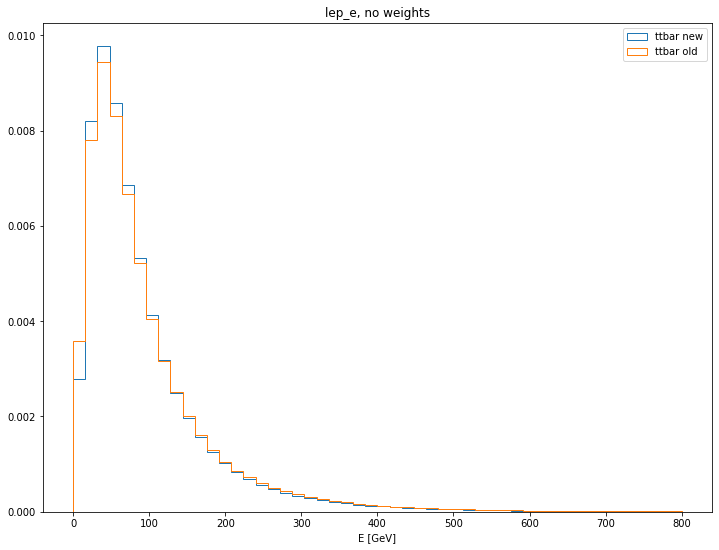

In [50]:
plt.figure(figsize=(12, 9))
for sample in samples_new:
    plt.hist(ak.flatten(data_new[sample].lep_e), range=(0, 800), bins=50, label=f"{sample} new", density=True, histtype="step")
    plt.hist(ak.flatten(data_old[sample].lep_E)/1000, range=(0, 800), bins=50, label=f"{sample} old", density=True, histtype="step")
    
plt.legend()
plt.title("lep_e, no weights")
plt.xlabel("E [GeV]")
plt.show()

In [51]:
start = time.time()
data_old = get_new_data(samples_old, treename_old, branches_old)
end = time.time()
print(f"took {end - start}s")


processing ttbar samples
  processed 863615 events, kept 863615
  processed 863615 events, kept 863615
  processed 863615 events, kept 863615
  processed 319694 events, kept 319694
took 6.500908374786377s


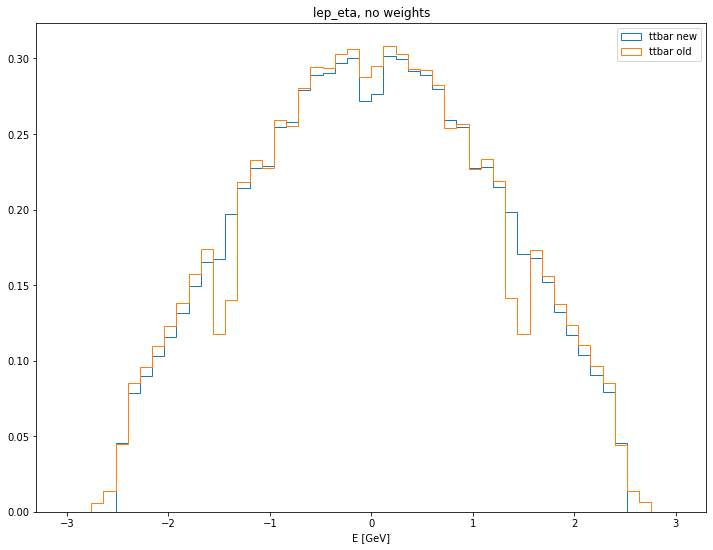

In [52]:
plt.figure(figsize=(12, 9))
for sample in samples_new:
    plt.hist(ak.flatten(data_new[sample].lep_eta), range=(-3, 3), bins=50, label=f"{sample} new", density=True, histtype="step")
    plt.hist(ak.flatten(data_old[sample].lep_eta), range=(-3, 3), bins=50, label=f"{sample} old", density=True, histtype="step")
plt.legend()
plt.title("lep_eta, no weights")
plt.xlabel("E [GeV]")
plt.show()

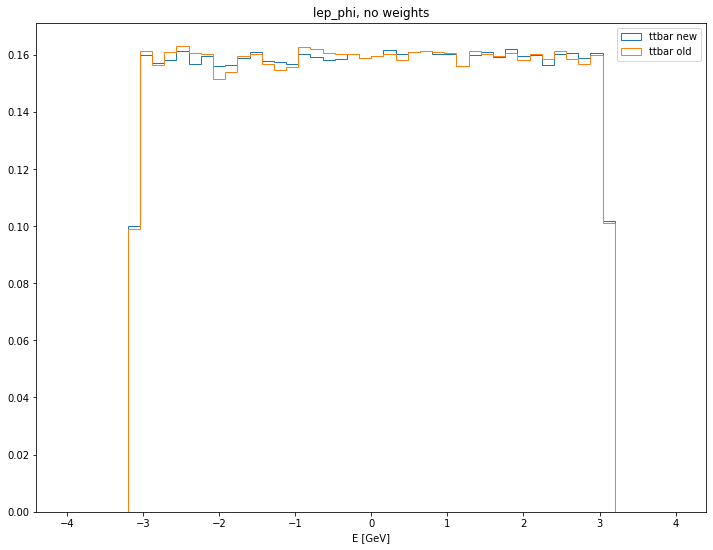

In [53]:
plt.figure(figsize=(12, 9))
for sample in samples_new:
    plt.hist(ak.flatten(data_new[sample].lep_phi), range=(-4, 4), bins=50, label=f"{sample} new", density=True, histtype="step")
    plt.hist(ak.flatten(data_old[sample].lep_phi), range=(-4, 4), bins=50, label=f"{sample} old", density=True, histtype="step")
plt.legend()
plt.title("lep_phi, no weights")
plt.xlabel("E [GeV]")
plt.show()

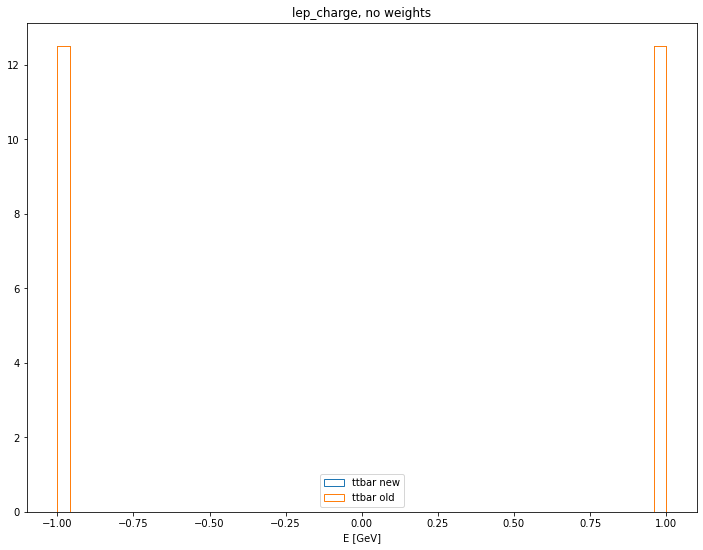

In [54]:
plt.figure(figsize=(12, 9))
for sample in samples_new:
    plt.hist(ak.flatten(data_new[sample].lep_charge), range=(-1, 1), bins=50, label=f"{sample} new", density=True, histtype="step")
    plt.hist(ak.flatten(data_old[sample].lep_charge), range=(-1, 1), bins=50, label=f"{sample} old", density=True, histtype="step")
plt.legend()
plt.title("lep_charge, no weights")
plt.xlabel("E [GeV]")
plt.show()

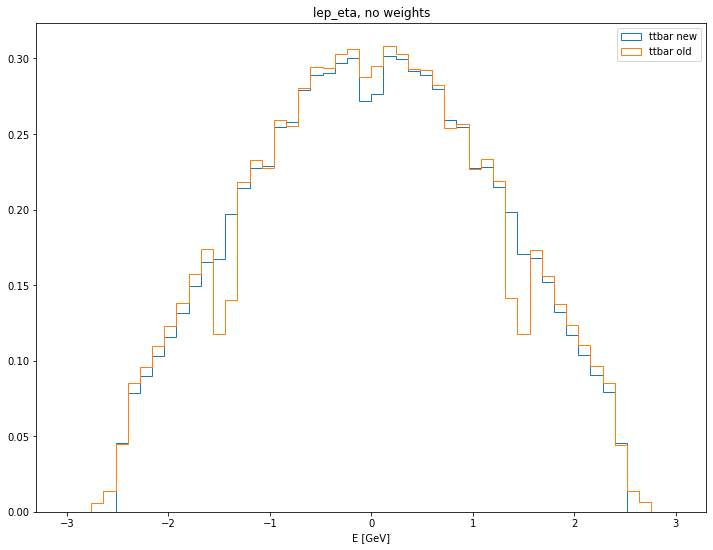

In [55]:
plt.figure(figsize=(12, 9))
for sample in samples_new:
    plt.hist(ak.flatten(data_new[sample].lep_eta), range=(-3, 3), bins=50, label=f"{sample} new", density=True, histtype="step")
    plt.hist(ak.flatten(data_old[sample].lep_eta), range=(-3, 3), bins=50, label=f"{sample} old", density=True, histtype="step")
plt.legend()
plt.title("lep_eta, no weights")
plt.xlabel("E [GeV]")
plt.show()

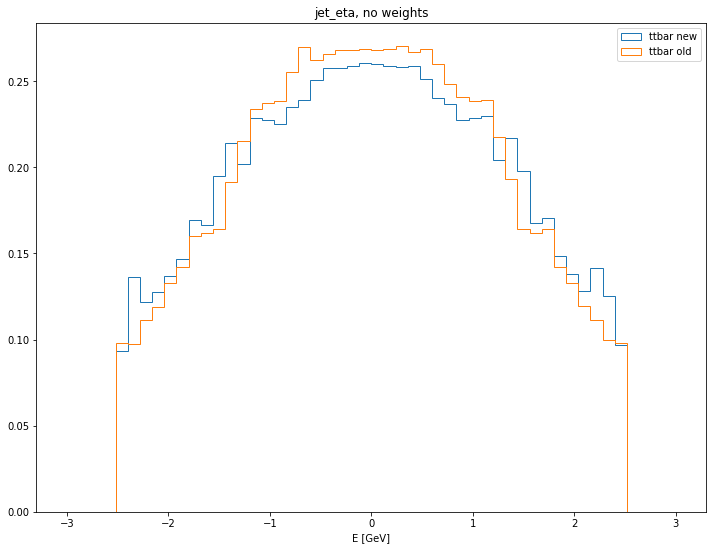

In [59]:
plt.figure(figsize=(12, 9))
for sample in samples_new:
    plt.hist(ak.flatten(data_new[sample].jet_eta), range=(-3, 3), bins=50, label=f"{sample} new", density=True, histtype="step")
    plt.hist(ak.flatten(data_old[sample].jet_eta), range=(-3, 3), bins=50, label=f"{sample} old", density=True, histtype="step")
plt.legend()
plt.title("jet_eta, no weights")
plt.xlabel("E [GeV]")
plt.show()

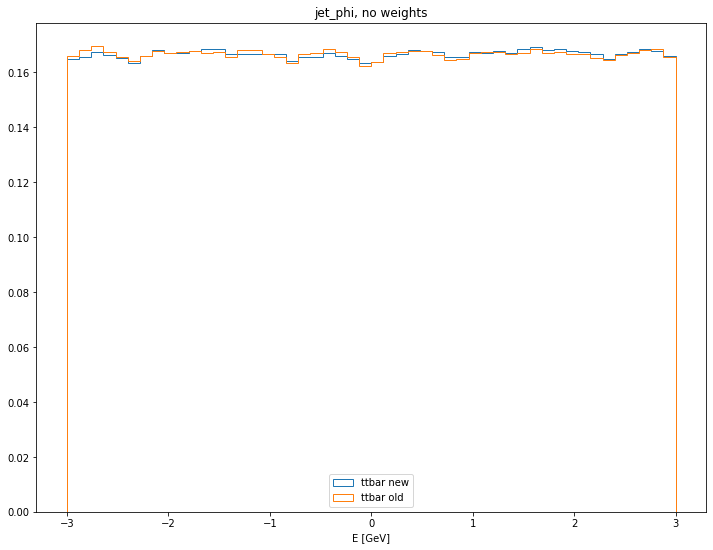

In [61]:
plt.figure(figsize=(12, 9))
for sample in samples_new:
    plt.hist(ak.flatten(data_new[sample].jet_phi), range=(-3, 3), bins=50, label=f"{sample} new", density=True, histtype="step")
    plt.hist(ak.flatten(data_old[sample].jet_phi), range=(-3, 3), bins=50, label=f"{sample} old", density=True, histtype="step")
plt.legend()
plt.title("jet_phi, no weights")
plt.xlabel("E [GeV]")
plt.show()

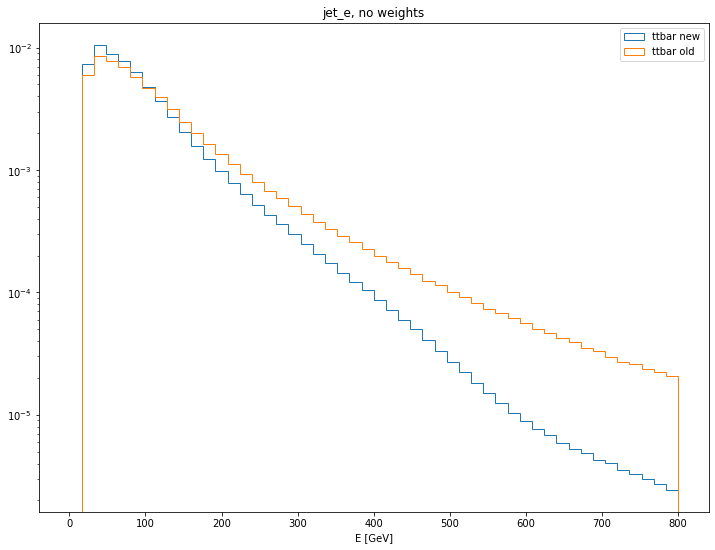

In [76]:
plt.figure(figsize=(12, 9))
for sample in samples_new:
    plt.hist(ak.flatten(data_new[sample].jet_e), range=(0, 800), bins=50, label=f"{sample} new", density=True, histtype="step", log=True)
    plt.hist(ak.flatten(data_old[sample].jet_E)/1000, range=(0, 800), bins=50, label=f"{sample} old", density=True, histtype="step")
plt.legend()
plt.title("jet_e, no weights")
plt.xlabel("E [GeV]")
plt.show()

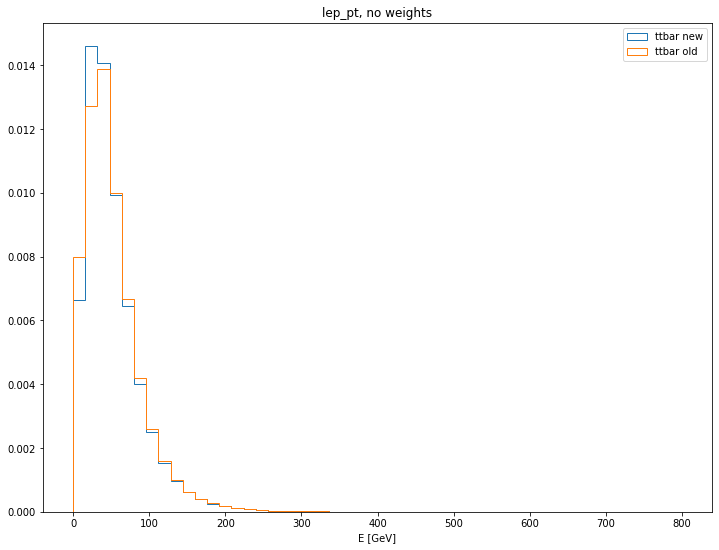

In [74]:
plt.figure(figsize=(12, 9))
for sample in samples_new:
    plt.hist(ak.flatten(data_new[sample].lep_pt), range=(0, 800), bins=50, label=f"{sample} new", density=True, histtype="step")
    plt.hist(ak.flatten(data_old[sample].lep_pt)/ 1000, range=(0, 800) , bins=50, label=f"{sample} old", density=True, histtype="step")
plt.legend()
plt.title("lep_pt, no weights")
plt.xlabel("E [GeV]")
plt.show()

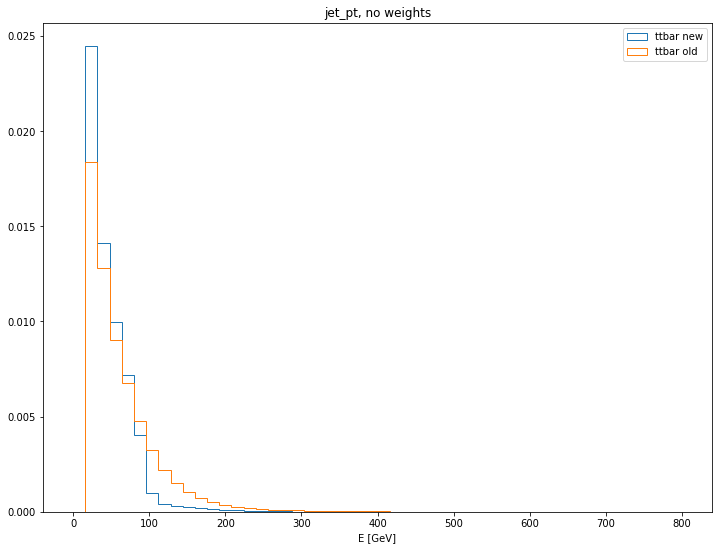

In [75]:
plt.figure(figsize=(12, 9))
for sample in samples_new:
    plt.hist(ak.flatten(data_new[sample].jet_pt), range=(0, 800), bins=50, label=f"{sample} new", density=True, histtype="step")
    plt.hist(ak.flatten(data_old[sample].jet_pt)/ 1000, range=(0, 800) , bins=50, label=f"{sample} old", density=True, histtype="step")
plt.legend()
plt.title("jet_pt, no weights")
plt.xlabel("E [GeV]")
plt.show()


In [57]:
data_old[sample].jet_eta



<Array [[-0.672, 1.53], ..., [0.2, ..., -1.96]] type='2910539 * var * float32'>

In [67]:
data_old[sample].lep_pt



<Array [[6.83e+04, 3.2e+04], [...], ..., [...]] type='2910539 * var * float32'>

In [97]:
def get_xsec_weight(sample):
    info = infofile.infos[sample] # open infofile
    xsec_weight = (lumi*1000*info["xsec"])/(info["sumw"]*info["red_eff"]) #*1000 to go from fb-1 to pb-1
    return xsec_weight # return cross-section weight

In [98]:
def calc_weight(xsec_weight, events):
    return (
        xsec_weight
        * events.mcWeight 
        * events.scaleFactor_PILEUP
        * events.scaleFactor_ELE
        * events.scaleFactor_MUON 
        * events.scaleFactor_LepTRIGGER
    )

In [99]:
 
data['totalWeight'] = calc_weight(xsec_weight, data)
mc_weights = [data_new[s].totalWeight for s in samples_new]
    

NameError: name 'xsec_weight' is not defined